In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

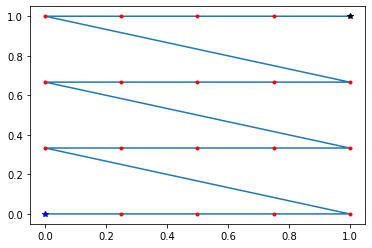

In [2]:
d = 2 # spatial dimension
nx = 4 # num cells in x direction
ny = 3 # num cells in y direction

vertices = np.zeros((d, (nx+1)*(ny+1)))

for jj in range(ny+1):
    for ii in range(nx+1):
        vertices[:,jj*(nx+1)+ii] = np.array([ii/nx, jj/ny])
        
plt.figure()
plt.plot(vertices[0,:], vertices[1,:])
plt.plot(vertices[0,:], vertices[1,:], '.r')
plt.plot(vertices[0,0], vertices[1,0], '*b')
plt.plot(vertices[0,-1], vertices[1,-1], '*k')

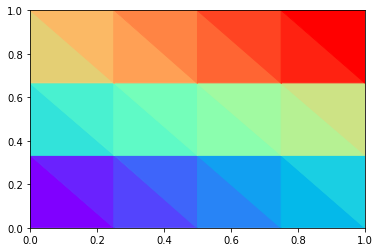

In [3]:
cells = np.zeros((d+1, 2*nx*ny), dtype=int)

kk=0
for jj in range(ny):
    for ii in range(nx):
        bot_left  = jj*(nx+1) + ii
        bot_right = bot_left + 1
        top_left  = bot_left + (nx+1)
        top_right = top_left + 1
        
        cells[:,kk] = np.array([bot_left, bot_right, top_left])
        kk += 1
        
        cells[:,kk] = np.array([bot_right, top_right, top_left])
        kk += 1
        
colors = cm.rainbow(np.linspace(0, 1, cells.shape[1]))
plt.figure()
for kk in range(cells.shape[1]):
    triangle = plt.Polygon(vertices[:,cells[:,kk]].T, color=colors[kk])
    plt.gca().add_patch(triangle)
    
plt.show()